# Lab 12 - Natural Language Processing

This section contains the following items in the rubric:
- 1-1: Reading Corpus
- 1-2: Cleaning HTML
- 1-3: Tokenization
- 2-0: Punctuation
- 3-2: Stop Words
- 4-1: Stemming
- 4-2: Lemmatization

In [3]:
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer

print("Reading text and tokenizing...")

response = urllib.request.urlopen('https://www.gutenberg.org/files/42324/42324-h/42324-h.htm')

html = response.read()
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text(strip=True)

s_tokens = sent_tokenize(text)
w_tokens = word_tokenize(text)

# removing punctuation
print("Removing Punctuation...")
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
tokens = [t.lower() for t in tokens]

print("Removing Stop Words...")
clean_tokens = tokens[:]
sr = stopwords.words("english")
for token in tokens:
    if token in stopwords.words("english"):
        clean_tokens.remove(token)

print("Stemming...")
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in clean_tokens]

print("Lemmatizing...")
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]

Reading text and tokenizing...
Removing Punctuation...
Removing Stop Words...
Stemming...
Lemmatizing...


This code contains the following items in the rubric:
- 5-0: Parts of Speech Analysis

POS Analysis
project:NN
gutenberg:NN
ebook:NN
frankenstein:NN
modern:JJ
prometheus:NN
mary:JJ
w:NN
shelley:JJ
start:NN
project:NN
gutenberg:NN
ebook:VBD
42324:CD
frankenstein:NN
modern:JJ
prometheus:NN
mary:JJ
w:NN
shelley:NN
author:NN
last:JJ
man:NN
perkin:VBD
warbeck:WP
c:JJ
c:JJ
transcriber:NN
note:NN
text:NN
produced:VBD
photo:NN
reprint:NN
1831:CD
edition:NN
revised:VBN
corrected:VBN
illustrated:JJ
new:JJ
introduction:NN
author:NN
london:NN
henry:NN
colburn:VBP
richard:NN
bentley:NN
new:JJ
burlington:NNP
street:NN
bell:RB
bradfute:JJ
edinburgh:NN
cumming:VBG
dublin:NN
1831:CD
introduction:NN
publisher:NN
standard:NN
novel:NN
selecting:VBG
frankenstein:RB
one:CD
series:NN
expressed:VBD
wish:JJ
furnish:JJ
account:NN
origin:JJ
story:NN
willing:JJ
comply:NN
shall:MD
thus:RB
give:VB
general:JJ
answer:JJR
question:NN
frequently:RB
asked:VBD
young:JJ
girl:NNS
came:VBD
think:VBP
dilate:JJ
upon:IN
hideous:JJ
idea:NN
true:JJ
averse:JJ
bringing:VBG
forward:RB
print:NN
account:NN
appear:VBP
a

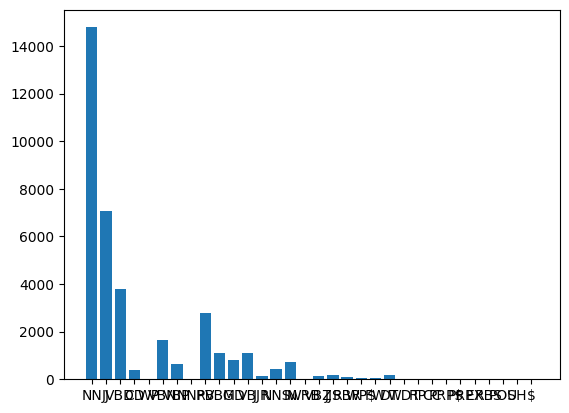

In [4]:
print("POS Analysis")
import operator
pos = nltk.pos_tag(lemmatized_tokens)
pos_counts = {}
for key, val in pos:
    print(str(key) + ":" + str(val))
    if val not in pos_counts.keys():
        pos_counts[val] = 1
    else:
        pos_counts[val] += 1

print(pos_counts)
plt.bar(range(len(pos_counts)), list(pos_counts.values()), align="center")
plt.xticks(range(len(pos_counts)), list(pos_counts.keys()))
plt.show()

This code contains the following items from the rubric:
- 3-1: Frequency Analysis

project:6
gutenberg:3
ebook:3
frankenstein:30
modern:13
prometheus:3
mary:2
w:4
shelley:5
start:1
42324:2
author:14
last:34
man:138
perkin:1
warbeck:1
c:2
transcriber:2
note:6
text:1
produced:13
photo:1
reprint:1
1831:3
edition:1
revised:1
corrected:3
illustrated:2
new:42
introduction:5
london:11
henry:27
colburn:1
richard:1
bentley:1
burlington:1
street:11
bell:1
bradfute:1
edinburgh:5
cumming:1
dublin:1
publisher:1
standard:2
novel:2
selecting:1
one:232
series:7
expressed:28
wish:32
furnish:1
account:26
origin:5
story:34
willing:1
comply:9
shall:108
thus:68
give:29
general:7
answer:23
question:15
frequently:6
asked:18
young:31
girl:30
came:43
think:34
dilate:1
upon:135
hideous:16
idea:57
true:24
averse:2
bringing:2
forward:15
print:3
appear:23
appendage:1
former:15
production:4
confined:11
topic:2
connection:4
authorship:2
alone:46
scarcely:15
accuse:3
personal:3
intrusion:3
singular:4
daughter:16
two:41
person:22
distinguished:10
literary:4
celebrity:1
early:17
life:133
thought:119


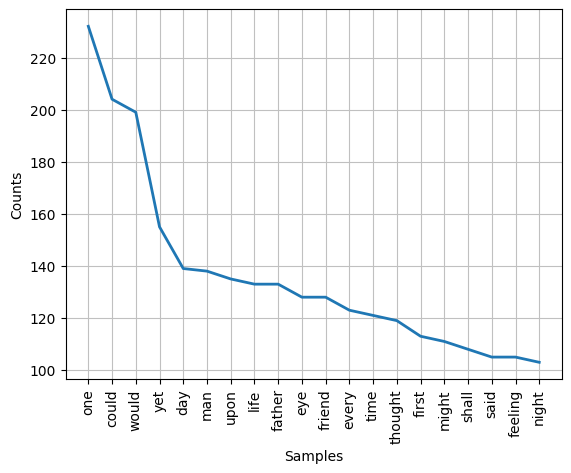

In [5]:
# obtaining word counts
freq = nltk.FreqDist(lemmatized_tokens) # lowercase, non-punctuated 
for key,val in freq.items():
    print(str(key) + ":" + str(val))
print("Length of Unique Items:", len(freq.items()))
freq.plot(20, cumulative=False)
plt.show()

This code contains the following items in the rubric:
- 6-0: N-Grams

In [6]:
print("Tri-Grams...")
from nltk import ngrams
trigrams = ngrams(text.split(), 3)
for gram in trigrams: print(gram)

Tri-Grams...
('The', 'Project', 'Gutenberg')
('Project', 'Gutenberg', 'eBook')
('Gutenberg', 'eBook', 'of')
('eBook', 'of', 'Frankenstein:')
('of', 'Frankenstein:', 'or,')
('Frankenstein:', 'or,', 'The')
('or,', 'The', 'Modern')
('The', 'Modern', 'Prometheus,')
('Modern', 'Prometheus,', 'by')
('Prometheus,', 'by', 'Mary')
('by', 'Mary', 'W.')
('Mary', 'W.', 'Shelley.***')
('W.', 'Shelley.***', 'START')
('Shelley.***', 'START', 'OF')
('START', 'OF', 'THE')
('OF', 'THE', 'PROJECT')
('THE', 'PROJECT', 'GUTENBERG')
('PROJECT', 'GUTENBERG', 'EBOOK')
('GUTENBERG', 'EBOOK', '42324')
('EBOOK', '42324', '***FRANKENSTEIN:OR,THE')
('42324', '***FRANKENSTEIN:OR,THE', 'MODERN')
('***FRANKENSTEIN:OR,THE', 'MODERN', 'PROMETHEUS.BY')
('MODERN', 'PROMETHEUS.BY', 'MARY')
('PROMETHEUS.BY', 'MARY', 'W.')
('MARY', 'W.', 'SHELLEY.AUTHOR')
('W.', 'SHELLEY.AUTHOR', 'OF')
('SHELLEY.AUTHOR', 'OF', 'THE')
('OF', 'THE', 'LAST')
('THE', 'LAST', 'MAN,')
('LAST', 'MAN,', 'PERKIN')
('MAN,', 'PERKIN', 'WARBECK,')
('PE

This code contains the following items from the rubric:
- 7-0: Document-Term Matrix

In [ ]:
print("Document-Term Matrix")
import pandas as pd

response = urllib.request.urlopen("https://www.gutenberg.org/cache/epub/18247/pg18247-images.html")
html = response.read()
soup = BeautifulSoup(html, "html.parser")
text2 = soup.get_text(strip=True)

docs = [text, text2]
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

print("Instances of 'fear' in both documents:")
print(df["fear"]) # shows the count for this word in both documents

print("Instances of 'hope' in both documents:")
print(df["hope"]) # showss the count for this word in both documents

df.head()

Document-Term Matrix
Instances of 'fear' in both documents:
0     43
1    139
Name: fear, dtype: int64
Instances of 'hope' in both documents:
0     52
1    151
Name: hope, dtype: int64


,000,10,11,11th,12,12th,13,1348,13th,14,...,ypsilanti,zaimi,zeal,zealous,zealously,zenith,zest,œdipus,œrta,ας
0,0,0,0,2,0,2,0,0,1,0,...,0,0,4,0,0,0,0,0,0,0
1,1,2,2,0,2,0,2,1,0,2,...,1,4,7,1,1,1,3,4,1,1
